In [174]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv('Dataset/FloridaBikeRentals.csv', encoding='unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Check for null values and handle missing data


In [176]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [177]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### Observation
There are no null values

## Convert Date Columns to Date format

In [178]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

## Extract day, month, day of the week, etc.

In [179]:
df['Day of Week'] = df['Date'].dt.day_name()
df['Day of Week']

0       Thursday
1       Thursday
2       Thursday
3       Thursday
4       Thursday
          ...   
8755      Friday
8756      Friday
8757      Friday
8758      Friday
8759      Friday
Name: Day of Week, Length: 8760, dtype: object

In [180]:
df['Day of Week Number'] = df['Date'].dt.day_of_week
df['Day of Week Number']

0       3
1       3
2       3
3       3
4       3
       ..
8755    4
8756    4
8757    4
8758    4
8759    4
Name: Day of Week Number, Length: 8760, dtype: int32

In [181]:
df['Day'] = df['Date'].dt.day
df['Day']

0       12
1       12
2       12
3       12
4       12
        ..
8755    30
8756    30
8757    30
8758    30
8759    30
Name: Day, Length: 8760, dtype: int32

In [182]:
df['Month'] = df['Date'].dt.month
df['Month']

0        1
1        1
2        1
3        1
4        1
        ..
8755    11
8756    11
8757    11
8758    11
8759    11
Name: Month, Length: 8760, dtype: int32

In [183]:
df['Year'] = df['Date'].dt.year
df['Year']

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
8755    2018
8756    2018
8757    2018
8758    2018
8759    2018
Name: Year, Length: 8760, dtype: int32

In [184]:
def is_weekend(day):
    return day in ['Saturday', 'Sunday']
df['Weekend'] = np.where(df['Day of Week'].apply(is_weekend), 1, 0)

In [185]:
df[['Weekend', 'Day of Week']].sample(20)

,Weekend,Day of Week
7626,1,Sunday
5081,1,Saturday
1083,0,Monday
262,1,Sunday
6376,0,Thursday
8,0,Thursday
6200,0,Thursday
5191,0,Monday
4119,0,Monday
83,0,Wednesday


## Check correlation of features

In [186]:
df_corr = df.corr(numeric_only=True)

In [187]:
df_corr

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day of Week Number,Day,Month,Year,Weekend
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,-2.157677e-02,4.684885e-02,7.086107e-02,2.151618e-01,-3.225936e-02
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,8.730219e-18,4.206322e-16,1.036729e-15,2.336763e-14,-2.300554e-17
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,-4.117209e-03,8.090791e-02,4.968327e-02,3.777958e-01,-1.297241e-02
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-1.961674e-02,7.047359e-03,4.779778e-02,3.592468e-02,-3.674982e-02
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-3.163420e-02,-6.123440e-02,-8.206909e-02,-3.780878e-03,-2.239107e-02
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,2.987013e-02,-1.068595e-01,7.788783e-02,5.238110e-02,3.064954e-02
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,-1.602018e-02,6.970777e-02,6.510073e-02,3.363497e-01,-2.896569e-02
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-8.077327e-05,-3.445555e-03,-3.041240e-02,1.280860e-01,8.271095e-03
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-6.823037e-03,1.199827e-02,-2.279368e-02,2.752192e-02,-1.427960e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-3.146208e-02,1.014355e-01,5.475846e-02,-2.064178e-01,-2.255705e-02


<Axes: >

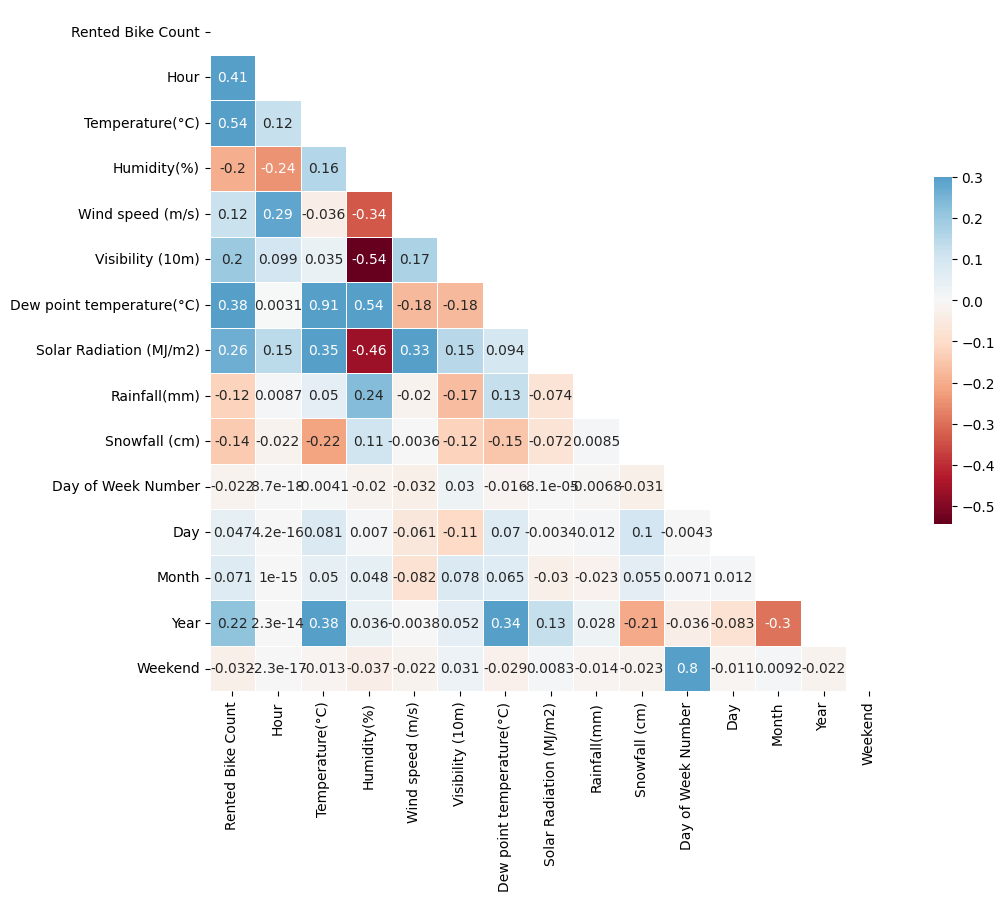

In [188]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap='RdBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            , annot=True)


## Plot the distribution for bike rent count

In [189]:
df['Rented Bike Count']

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

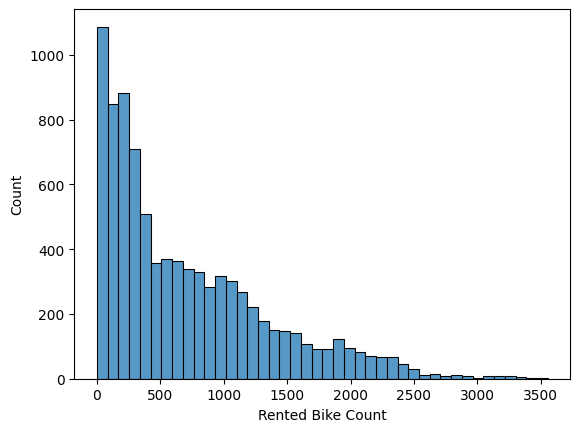

In [190]:
sns.histplot(df['Rented Bike Count'])

## Plot histogram of all numerical features

In [191]:
list(df_corr.columns)

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day of Week Number',
 'Day',
 'Month',
 'Year',
 'Weekend']

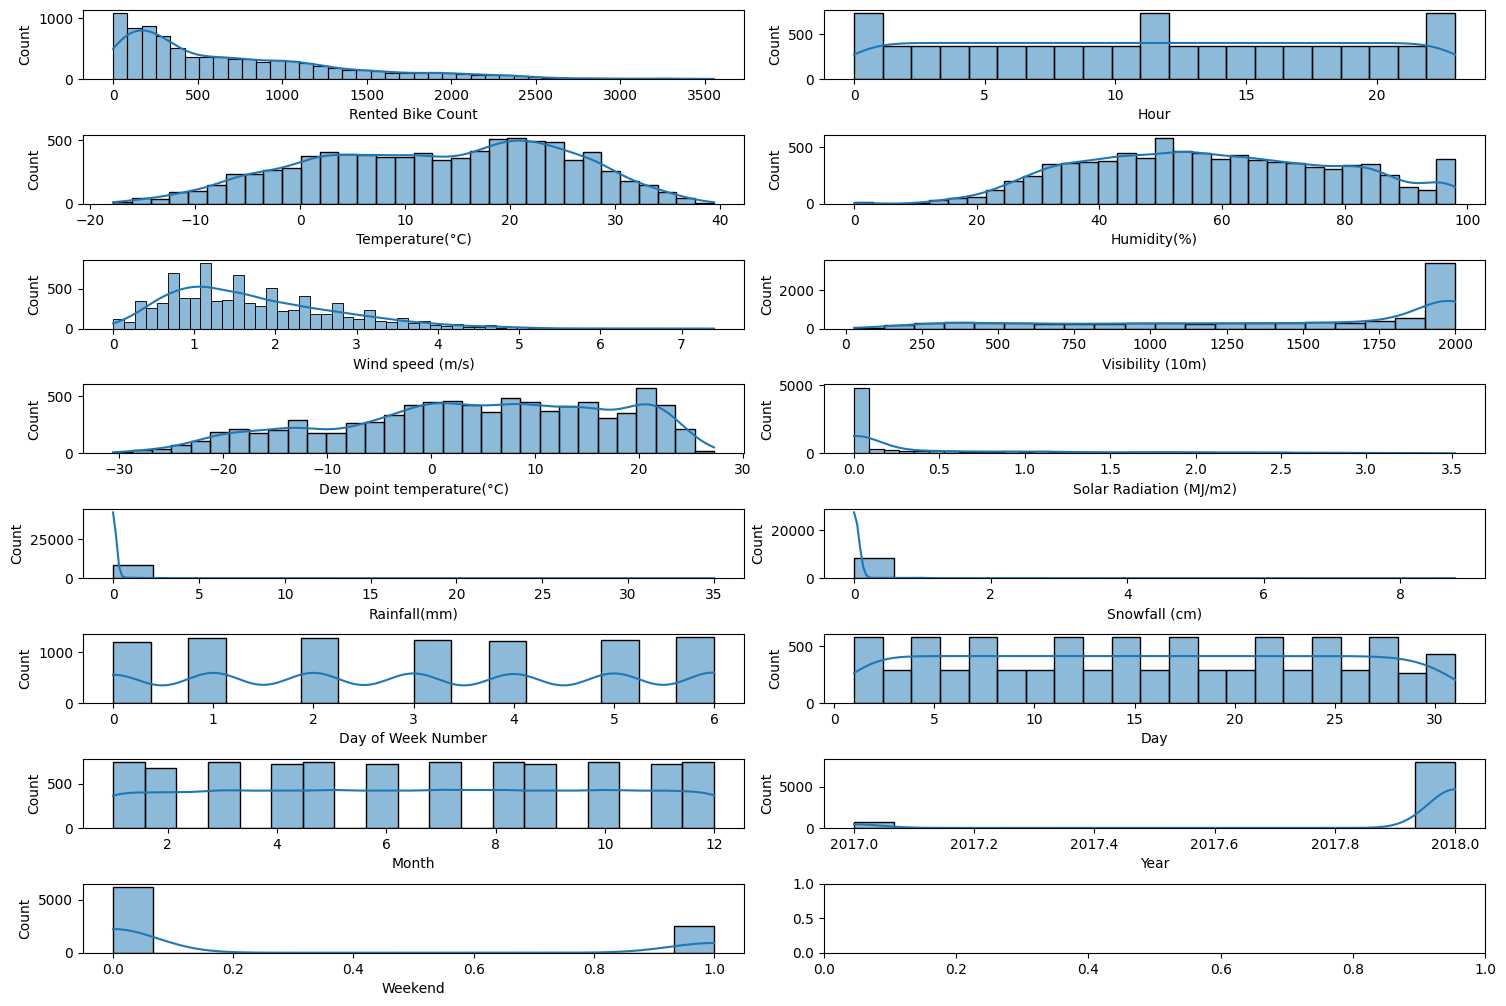

In [192]:
fig, axs = plt.subplots(ncols=2,nrows=8,figsize=(15,10))

axs = axs.flatten()
index = 0
for k,v in df[list(df_corr.columns)].items():
    sns.histplot(data = df, x = k, kde= True, ax=axs[index])
    index+=1

plt.tight_layout(pad=0.5)

# axs[0][0].set_title('before outlier treatment')
# axs[0][1].set_title('after outlier treatment')

## Create Boxplot of 'Rented Bike Count' against all categorical features

<Axes: ylabel='Weekend,Day of Week'>

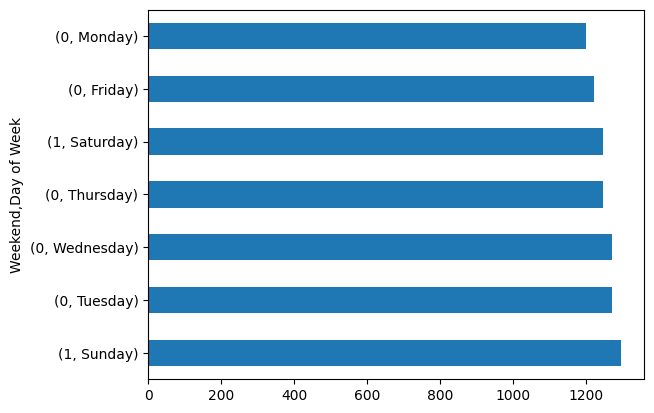

In [193]:
df[["Weekend", "Day of Week"]].value_counts().plot(kind="barh")

In [194]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['Seasons', 'Holiday', 'Functioning Day', 'Day of Week'], dtype='object')

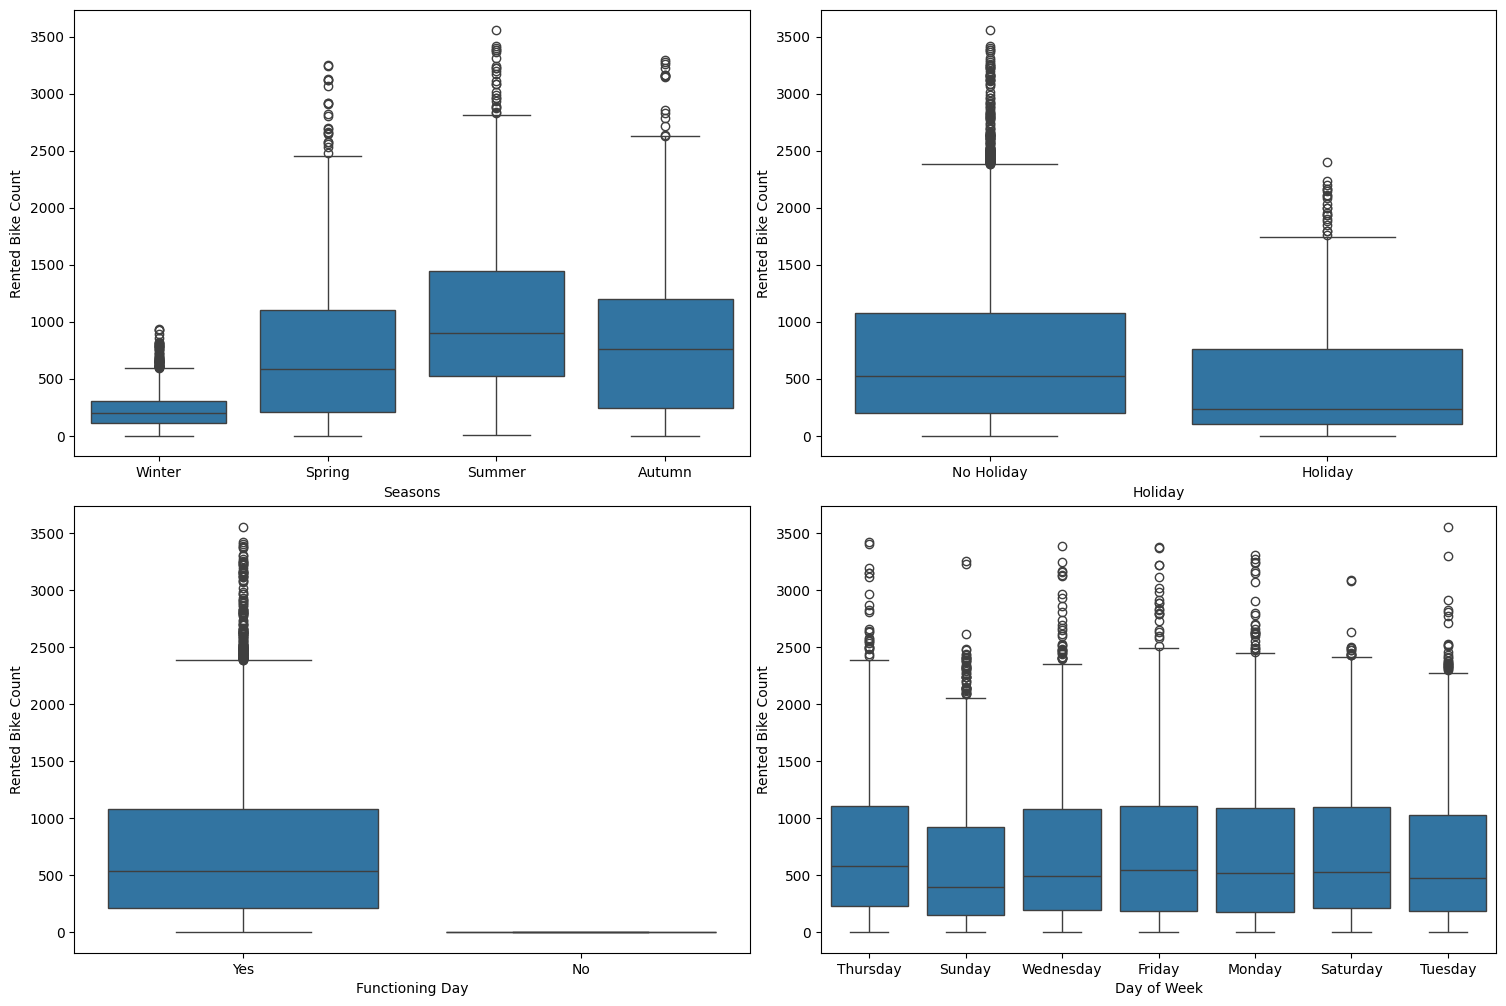

In [195]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(15,10))

axs = axs.flatten()
index = 0
for i in cat_features:
    sns.boxplot(data = df, x = i, y='Rented Bike Count', ax=axs[index])
    index+=1

plt.tight_layout(pad=0.5)

## Plot the seaborn catplot of Rented Bike Count against features hour, day, holiday, rainfall, snowfall, weekdays, weekend

In [196]:
features = ['Hour', 'Holiday', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekend']


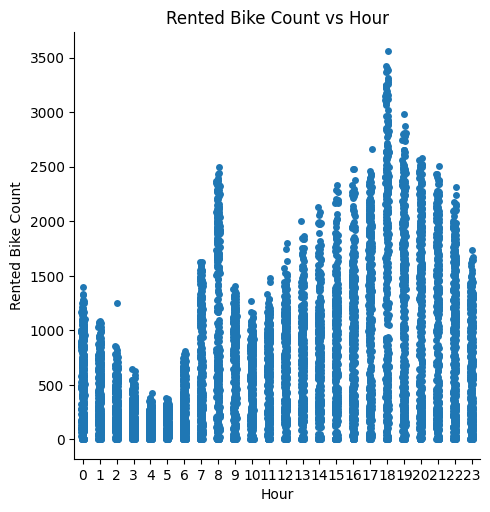

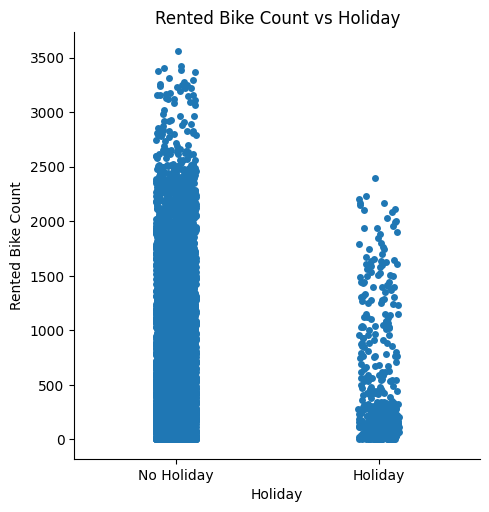

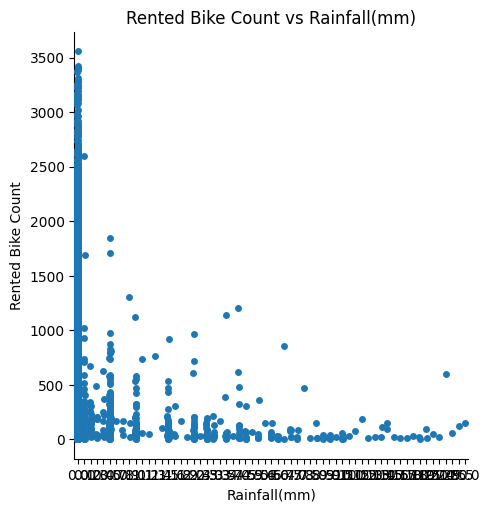

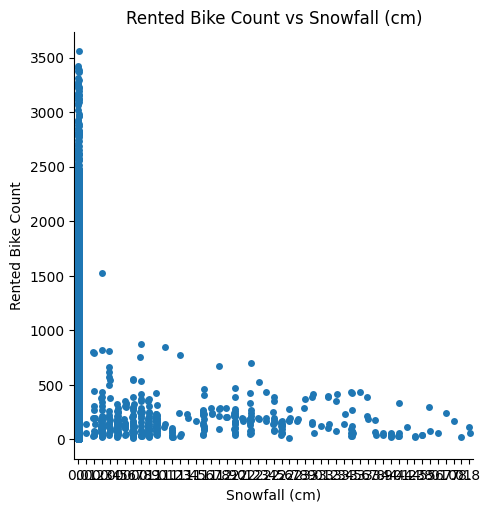

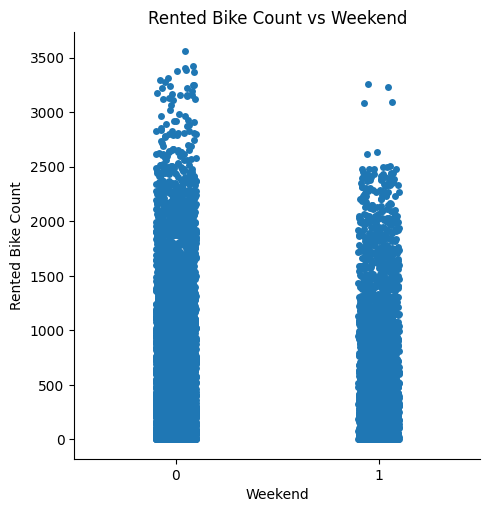

In [197]:
# Create catplots for each feature
for feature in features:
    sns.catplot(x=feature, y='Rented Bike Count', data=df)
    plt.title(f'Rented Bike Count vs {feature}')
    plt.show()

## Encode categorical features into numerical

In [198]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day of Week', 'Day of Week Number',
       'Day', 'Month', 'Year', 'Weekend'],
      dtype='object')

In [199]:
df = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day'], dtype=int)
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Year,Weekend,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,2017,0,0,0,0,1,0,1,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,2017,0,0,0,0,1,0,1,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,2017,0,0,0,0,1,0,1,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,2017,0,0,0,0,1,0,1,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,2017,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,...,2018,0,1,0,0,0,0,1,0,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,...,2018,0,1,0,0,0,0,1,0,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,...,2018,0,1,0,0,0,0,1,0,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,...,2018,0,1,0,0,0,0,1,0,1


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Day of Week                8760 non-null   object        
 12  Day of

In [201]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Day of Week', 'Day of Week Number', 'Day', 'Month', 'Year', 'Weekend',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes'],
      dtype='object')

For these features we got these results:

X = df[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)','Rainfall(mm)', 'Snowfall (cm)', 'Day of Week Number', 'Month', 'Weekend', 'Seasons_Autumn','Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday','Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes']]


Training LinearRegression:
- Best parameter: {}
- Mean Squared Error (Test): 189631.445 | (Train): 189794.115
- R-Squared (Test): 0.541 | (Train): 0.544

Training Ridge:
- Best parameter: {'alpha': 20}
- Mean Squared Error (Test): 189577.568 | (Train): 189777.376
- R-Squared (Test): 0.541 | (Train): 0.544

Training Lasso:
- Best parameter: {'alpha': 1}
- Mean Squared Error (Test): 189578.555 | (Train): 189787.391
- R-Squared (Test): 0.541 | (Train): 0.544

In [219]:
# trying a different set of features

X = df[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Weekend', 'Holiday_Holiday','Holiday_No Holiday']]

y = df['Rented Bike Count']

In [213]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS_scaled = SS.fit_transform(X)
SS_scaled 

array([[-1.66132477, -1.51395724, -1.04248288, ..., -0.63973933,
        -0.22775689,  0.22775689],
       [-1.51686175, -1.53907415, -0.99336999, ..., -0.63973933,
        -0.22775689,  0.22775689],
       [-1.37239873, -1.58093567, -0.94425709, ..., -0.63973933,
        -0.22775689,  0.22775689],
       ...,
       [ 1.37239873, -0.86091752, -0.94425709, ..., -0.63973933,
        -0.22775689,  0.22775689],
       [ 1.51686175, -0.90277904, -0.8460313 , ..., -0.63973933,
        -0.22775689,  0.22775689],
       [ 1.66132477, -0.91952365, -0.74780551, ..., -0.63973933,
        -0.22775689,  0.22775689]])

In [215]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(SS_scaled, y, test_size=0.20, random_state=1)

In [216]:
models_params = [
    {'name': 'LinearRegression', 'model' : LinearRegression()},
    {'name': 'Ridge', 'model':Ridge(), 'params': {'alpha':[7,8,9,10,12, 20, 50]}},
    {'name': 'Lasso', 'model':Lasso(), 'params': {'alpha':[0.1,1,10,100]}}
]

In [217]:
for model_info in models_params:
    print(model_info)

{'name': 'LinearRegression', 'model': LinearRegression()}
{'name': 'Ridge', 'model': Ridge(), 'params': {'alpha': [7, 8, 9, 10, 12, 20, 50]}}
{'name': 'Lasso', 'model': Lasso(), 'params': {'alpha': [0.1, 1, 10, 100]}}


In [218]:
for i, model_info in enumerate(models_params):
    print(f"Training {model_info['name']}:")
    #deploy Grid Search with all 3 models
    GS = GridSearchCV(model_info['model']
                      , model_info.get('params',{})
                      , cv=5)
    # train/fit the model
    GS.fit(X_train, y_train)

    #evaluation
    best_model = GS.best_estimator_

    y_pred_test = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)


    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)

    r2_sc_test = r2_score(y_test, y_pred_test)
    r2_sc_train = r2_score(y_train, y_pred_train)

    print(f"Best parameter: {GS.best_params_}")
    print(f"Mean Squared Error (Test): {mse_test:.3f} | (Train): {mse_train:.3f}")
    print(f"R-Squared (Test): {r2_sc_test:.3f} | (Train): {r2_sc_train:.3f}")

Training LinearRegression:
Best parameter: {}
Mean Squared Error (Test): 223262.861 | (Train): 220193.436
R-Squared (Test): 0.460 | (Train): 0.471
Training Ridge:
Best parameter: {'alpha': 12}
Mean Squared Error (Test): 223347.040 | (Train): 220176.049
R-Squared (Test): 0.460 | (Train): 0.472
Training Lasso:
Best parameter: {'alpha': 1}
Mean Squared Error (Test): 223309.539 | (Train): 220182.668
R-Squared (Test): 0.460 | (Train): 0.472
